Zarur kutubxonalar chaqirib oldik va Sotuvlar haqidagi ma'lumotlarni o'qish va ishlov berish uchun pandas DataFramega o'tkazib oldik:

gross margin percentage-yalpi marja foizi as yalpi soliq.
Marja solig'i - Mahsulot tannarxidan qolgan sof foyda nisbatining 100ga ko'paytmasi 
Oddiy so'zlar bilan aytganda, savdo marjasi mahsulot tannarxi (uning ishlab chiqarish tannarxi yoki sotib olish qiymati)
va yakuniy (sotish) narxi o'rtasidagi farqdir.
Sanoatda marja stavkasi 20% , va savdoda - 30% .


---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv("/content/sotuvlar.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Berilgan DataFrameda ma'lumotlar to'liq ekanligini tekshirib ko'ramiz:

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

DataFrame haqida qisqacha statistika:


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
y = df["Gender"].value_counts()
y

Female    501
Male      499
Name: Gender, dtype: int64

Supermarket klientlarimiz ichida ayol yoki erkak qaysi biri ko'pligini bilib olamiz:

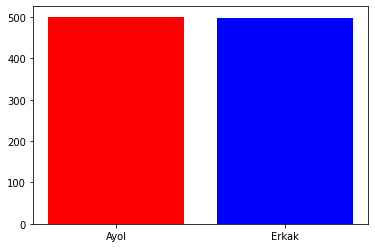

In [ ]:
x =["Ayol", "Erkak"]
#y = [501, 499]

plt.bar(x,y, color=["r","b"])
plt.show()

In [ ]:
def range_date_time(time):
    if time.hour < 12:
        return 'morning'
    elif time.hour < 18:
        return 'afternoon'
    else:
        return 'evening'

In [ ]:
df.Date = pd.to_datetime(df['Date'])
df = df.reset_index(drop=True).set_index('Date')
df.Time = pd.to_datetime(df.Time)
df['Time'] = df['Time'].apply(range_date_time)

In [ ]:
df_month_1 = df[df.index.month==1]
df_month_2 = df[df.index.month==2]
df_month_3 = df[df.index.month==3]

In [ ]:
df_total_time_1 = df_month_1.groupby(['Time']).sum()
df_total_time_2 = df_month_2.groupby(['Time']).sum()
df_total_time_3 = df_month_3.groupby(['Time']).sum()

In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
                    subplot_titles=['January', 'February', 'March'])
fig.add_trace(go.Pie(labels=df_total_time_1.index, values=df_total_time_1.Total, scalegroup='one',
                     name="Time"), row=1, col=1)
fig.add_trace(go.Pie(labels=df_total_time_2.index, values=df_total_time_2.Total, scalegroup='one',
                     name="Time"), row=1, col=2)
fig.add_trace(go.Pie(labels=df_total_time_3.index, values=df_total_time_3.Total, scalegroup='one',
                     name="Time"), row=1, col=3)

fig.update_layout(title_text='Kunning qaysi qismida xaridorlar faol:')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(y=df_month_1['Gender'], name='January'))
fig.add_trace(go.Histogram(y=df_month_2['Gender'], name='February'))
fig.add_trace(go.Histogram(y=df_month_3['Gender'], name="March"))
fig.update_layout(title_text='3 oylik savdodagi ayollar va erkaklar xaridining oylik statistikasi:')
fig.show()

Eng ko'p mahsulot sotilgan filial qaysi ekanligini bilib olamiz:

In [ ]:
df["Branch"].mode()[0]

'A'

Nechta shaharda filiallar borligini,unlarning nomlari va eng ko'p mahsulot sotilgan shahar qaysi ekanligini bilib olamiz:


In [ ]:
df["City"].value_counts()#.head(1).index[0]

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

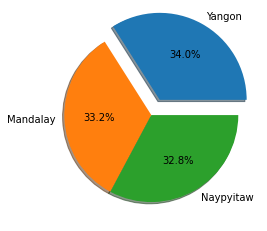

In [ ]:
y =  [340, 332, 328]
mylabels = ["Yangon ", "Mandalay", "Naypyitaw"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%', shadow=True)
plt.show()


<BarContainer object of 3 artists>

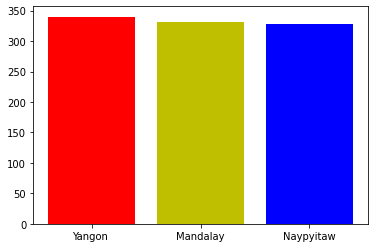

In [ ]:
citys = ["Yangon ", "Mandalay", "Naypyitaw"]
citys_count = [340, 332, 328]
  
# Plotting barchart
plt.bar(citys, citys_count,color=["r","y","blue"])

In [ ]:
df_a_branch = df[df['Branch']=='A']
df_b_branch = df[df['Branch']=='B']
df_c_branch = df[df['Branch']=='C']

In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
                    subplot_titles=['A Fiali', 'B filiali', 'C filiali'])
fig.add_trace(go.Pie(labels=df_a_branch['Product line'], values=df_a_branch['gross income'], scalegroup='one',
                     name="Soni"), row=1, col=1)
fig.add_trace(go.Pie(labels=df_b_branch['Product line'], values=df_b_branch['gross income'], scalegroup='one',
                     name="Soni"), row=1, col=2)
fig.add_trace(go.Pie(labels=df_c_branch['Product line'], values=df_c_branch['gross income'], scalegroup='one',
                     name="Soni"), row=1, col=3)

fig.update_layout(title_text='Supermaret filiallarini mahsulotlarning sof foydasi')
fig.show()

In [ ]:
products = df_a_branch.groupby(['Product line']).count()

In [ ]:
fig = px.bar(products, x='Quantity', title='A branchni sotilgan mahsulotlar soni', color=products.index)
fig.show()

In [ ]:
productss = df_b_branch.groupby(['Product line']).count()
fig = px.bar(products, x='Quantity', title='B branchni sotilgan mahsulotlar soni', color=productss.index)
fig.show()

In [ ]:
productszs = df_c_branch.groupby(['Product line']).count()
fig = px.bar(products, x='Quantity', title='C branchni sotilgan mahsulotlar soni', color=productszs.index)
fig.show()